#Большие данные
#Отчет. Извлечение данных. SQL
#Подготовил: Подрядчиков Владимир Валерьевич, группа 02421-ДБ

#Часть 1. Написание запросов по базе данных "Пассажирские авиаперевозки"

###Задание 1

Напишите запрос, который посчитает количество билетов в таблице tickets.

```
SELECT COUNT(*) AS total_tickets
FROM tickets;
```

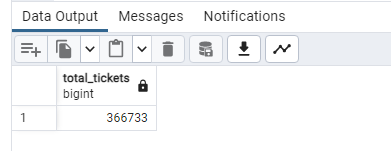

###Задание 2

Напишите запрос, который посчитает количество билетов в таблице tickets, купленное на
имя ‘DENIS’.

```
SELECT COUNT(*) AS denis_count
FROM tickets
WHERE passenger_name LIKE 'DENIS%';
```
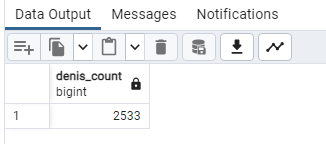


###Задание 3
Напишите запрос, который вернет имя пассажира и количество билетов этого пассажира,
взятые из таблицы tickets, отсортированное по второму столбцу в порядке убывания.

```
SELECT passenger_name, COUNT(*) AS total_tickets
FROM tickets
GROUP BY passenger_name
ORDER BY total_tickets DESC;
```
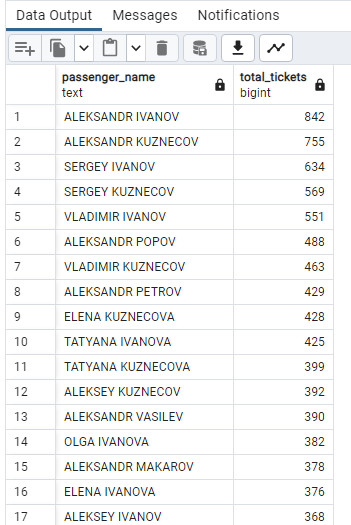


###Задание 4

Напишите запрос, который вернет имя пассажира и количество билетов этого пассажира,
взятые из таблицы tickets, отсортированное по второму столбцу в порядке убывания, при
условии, что имена пассажиров = ‘DENIS’.

```
SELECT passenger_name, COUNT(*) AS total_tickets
FROM tickets
WHERE passenger_name LIKE 'DENIS%'
GROUP BY passenger_name
ORDER BY total_tickets DESC;
```

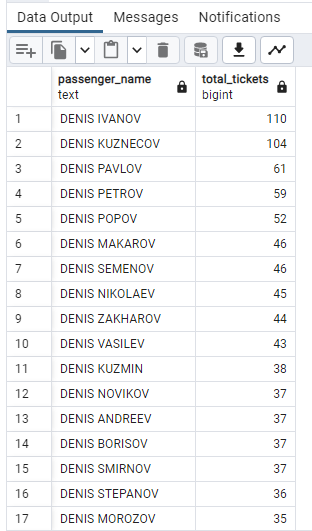


###Задание 5

Напишите запрос, который из таблицы ticket_flight вернет максимальное и минимальное
значение атрибута amount одновременно (т. е. на выходе вы получите 2 столбца).

```
SELECT MAX(amount), MIN(amount)
FROM ticket_flights;
```
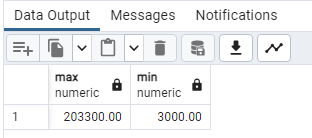


###Задание 6
Напишите запрос, который вернет вам атрибуты aircraft_code, model из таблицы aircrafts, а также атрибуты fare_condition, count (посчитанное количество посадочных мест
определенного класса для определенной модели самолета) из таблицы seats.

```
SELECT a.aircraft_code, a.model, b.fare_conditions, COUNT(b.seat_no)
FROM aircrafts_data a JOIN seats b ON a.aircraft_code = b.aircraft_code
GROUP BY a.aircraft_code, a.model, b.fare_conditions;
```
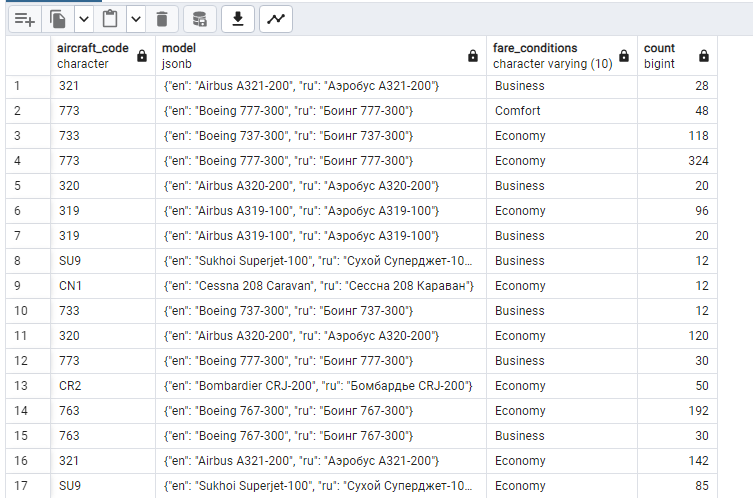


###Задание 7

Напишите запрос, который даст ответ на следующий вопрос: в какие города можно улететь
как из Москвы, так и из Санкт-Петербурга?

```
SELECT DISTINCT city FROM airports_data WHERE airport_code IN (
SELECT DISTINCT arrival_airport
FROM flights a JOIN airports_data b ON a.departure_airport = b.airport_code
WHERE city ->> 'en' = 'Moscow'
INTERSECT
SELECT DISTINCT arrival_airport
FROM flights a JOIN airports_data b ON a.departure_airport = b.airport_code
WHERE city ->> 'en' = 'St. Petersburg'
)
```

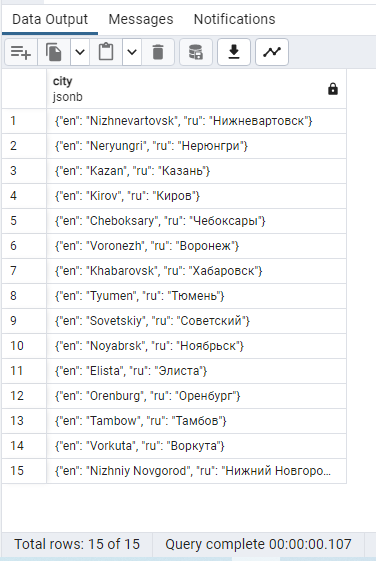

###Задание 8
Напишите запрос, который даст ответ на следующий вопрос: в какие города можно улететь
из Санкт-Петербурга, но нельзя из Москвы?

```
SELECT DISTINCT city FROM airports_data WHERE airport_code IN (
SELECT DISTINCT arrival_airport
FROM flights a JOIN airports_data b ON a.departure_airport = b.airport_code
WHERE city ->> 'en' = 'St. Petersburg'
EXCEPT
SELECT DISTINCT arrival_airport
FROM flights a JOIN airports_data b ON a.departure_airport = b.airport_code
WHERE city ->> 'en' = 'Moscow'
)
```
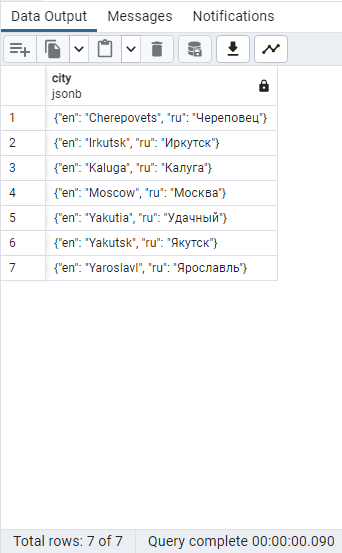

#Часть 2. 30 заданий с сайта https://sql-ex.ru/

###Задание: 1 (Serge I: 2002-09-30)

####База данных для заданий 1-13, 15-28:  
Схема БД состоит из четырех таблиц:  
Product(maker, model, type)  
PC(code, model, speed, ram, hd, cd, price)  
Laptop(code, model, speed, ram, hd, price, screen)  
Printer(code, model, color, type, price)  
  
Таблица Product представляет производителя (maker), номер модели (model) и тип ('PC' - ПК, 'Laptop' - ПК-блокнот или 'Printer' - принтер). Предполагается, что номера моделей в таблице Product уникальны для всех производителей и типов продуктов.  

В таблице PC для каждого ПК, однозначно определяемого уникальным кодом – code, указаны модель – model (внешний ключ к таблице Product), скорость - speed (процессора в мегагерцах), объем памяти - ram (в мегабайтах), размер диска - hd (в гигабайтах), скорость считывающего устройства - cd (например, '4x') и цена - price (в долларах).  
  
Таблица Laptop аналогична таблице РС за исключением того, что вместо скорости CD содержит размер экрана -screen (в дюймах). В таблице Printer для каждой модели принтера указывается, является ли он цветным - color ('y', если цветной), тип принтера - type (лазерный – 'Laser', струйный – 'Jet' или матричный – 'Matrix') и цена - price.


---


Найдите номер модели, скорость и размер жесткого диска для всех ПК стоимостью менее 500 дол. Вывести: model, speed и hd

Ответ:  
```
SELECT model, speed, hd FROM PC
WHERE price < 500  
```
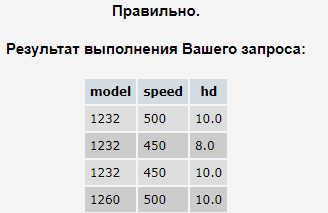

###Задание: 2 (Serge I: 2002-09-21)
Найдите производителей принтеров. Вывести: maker  
Ответ:  
```
SELECT DISTINCT maker FROM Product WHERE type = 'printer'  
```
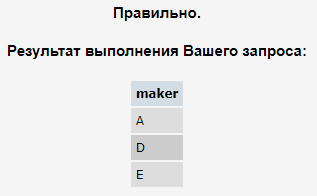

###Задание: 3 (Serge I: 2002-09-30)
Найдите номер модели, объем памяти и размеры экранов ПК-блокнотов, цена которых превышает 1000 дол.  
Ответ:  
```
SELECT model, ram, screen FROM Laptop WHERE price > 1000  
```
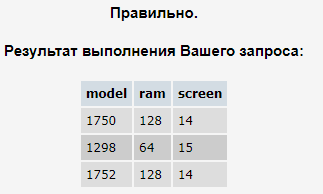


###Задание: 4 (Serge I: 2002-09-21)
Найдите все записи таблицы Printer для цветных принтеров.  
Ответ:  
```
SELECT * FROM Printer WHERE color = 'y'  
```
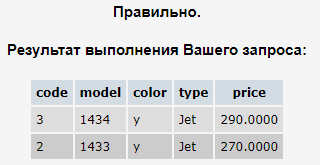

###Задание: 5 (Serge I: 2002-09-30)  
Найдите номер модели, скорость и размер жесткого диска ПК, имеющих 12x или 24x CD и цену менее 600 дол.  
Ответ:
```
SELECT model, speed, hd FROM PC  
WHERE (cd = '12x' OR cd = '24x') and price < 600   
```
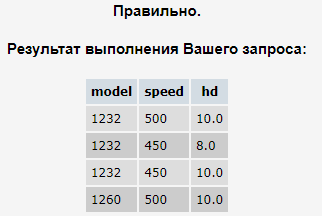

###Задание: 6 (Serge I: 2002-10-28)
Для каждого производителя, выпускающего ПК-блокноты c объёмом жесткого диска не менее 10 Гбайт, найти скорости таких ПК-блокнотов. Вывод: производитель, скорость.  
Ответ:  
```
SELECT DISTINCT maker, speed  
FROM Product INNER JOIN  
    Laptop ON Product.model = Laptop.model  
    WHERE hd >= 10  
```
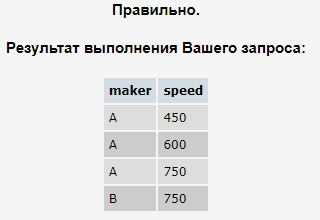

###Задание: 7 (Serge I: 2002-11-02)
Найдите номера моделей и цены всех имеющихся в продаже продуктов (любого типа) производителя B (латинская буква).  
Ответ:  
```
SELECT PC.model, price FROM PC  
INNER JOIN Product ON PC.model = Product.model  
WHERE maker = 'B'  
UNION  
SELECT Laptop.model, price FROM Laptop  
INNER JOIN Product ON Laptop.model = Product.model  
WHERE maker = 'B'  
UNION  
SELECT Printer.model, price FROM Printer  
INNER JOIN Product ON Printer.model = Product.model  
WHERE maker = 'B'  
```
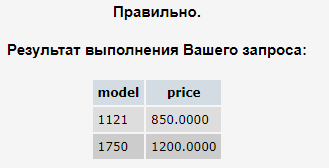

###Задание: 8 (Serge I: 2003-02-03)
Найдите производителя, выпускающего ПК, но не ПК-блокноты.  
Ответ:  
```
SELECT DISTINCT maker FROM Product  
WHERE type = 'PC'  
EXCEPT  
SELECT DISTINCT maker FROM Product  
WHERE type = 'Laptop'  
```
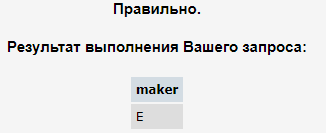

###Задание: 9 (Serge I: 2002-11-02)
Найдите производителей ПК с процессором не менее 450 Мгц. Вывести: Maker  
Ответ:
```
SELECT DISTINCT maker
FROM Product INNER JOIN  
    PC ON Product.model = PC.model  
    WHERE speed >= 450  
```
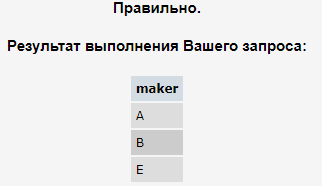


###Задание: 10 (Serge I: 2002-09-23)  
Найдите модели принтеров, имеющих самую высокую цену. Вывести: model, price  
Ответ:  
```
SELECT model, price FROM Printer  
WHERE price = (SELECT max(price) FROM Printer)  
```
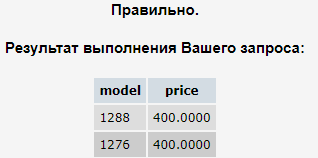


###Задание: 11 (Serge I: 2002-11-02)
Найдите среднюю скорость ПК.  
Ответ:
```  
SELECT AVG(speed) FROM PC  
```
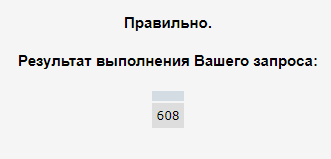

###Задание: 12 (Serge I: 2002-11-02)
Найдите среднюю скорость ПК-блокнотов, цена которых превышает 1000 дол.  
Ответ:  
```
SELECT AVG(speed) FROM Laptop WHERE price > 1000  
```
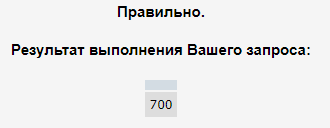

###Задание: 13 (Serge I: 2002-11-02)
Найдите среднюю скорость ПК, выпущенных производителем A.  
Ответ:  
```
SELECT AVG(speed) FROM PC INNER JOIN Product  
ON PC.model = Product.model  
WHERE maker = 'A'  
```

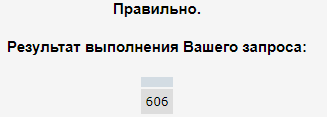

###Задание: 14 (Serge I: 2002-11-05)

####База данных для задания 14  
Рассматривается БД кораблей, участвовавших во второй мировой войне. Имеются следующие отношения:  
Classes (class, type, country, numGuns, bore, displacement)  
Ships (name, class, launched)  
Battles (name, date)  
Outcomes (ship, battle, result)  

Корабли в «классах» построены по одному и тому же проекту, и классу присваивается либо имя первого корабля, построенного по данному проекту, либо названию класса дается имя проекта, которое не совпадает ни с одним из кораблей в БД. Корабль, давший название классу, называется головным.
Отношение Classes содержит имя класса, тип (bb для боевого (линейного) корабля или bc для боевого крейсера), страну, в которой построен корабль, число главных орудий, калибр орудий (диаметр ствола орудия в дюймах) и водоизмещение ( вес в тоннах). В отношении Ships записаны название корабля, имя его класса и год спуска на воду. В отношение Battles включены название и дата битвы, в которой участвовали корабли, а в отношении Outcomes – результат участия данного корабля в битве (потоплен-sunk, поврежден - damaged или невредим - OK).  

Замечания.  
1) В отношение Outcomes могут входить корабли, отсутствующие в отношении Ships.  
2) Потопленный корабль в последующих битвах участия не принимает.


---


Найдите класс, имя и страну для кораблей из таблицы Ships, имеющих не менее 10 орудий.  
Ответ:  
```
SELECT Ships.class, name, country FROM  
Ships INNER JOIN Classes ON Ships.class = Classes.class  
WHERE numGuns >= 10  
```
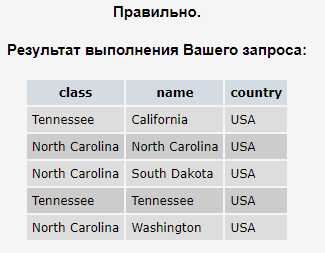

###Задание: 15 (Serge I: 2003-02-03)
Найдите размеры жестких дисков, совпадающих у двух и более PC. Вывести: HD  
Ответ:
```
SELECT hd FROM PC GROUP BY hd HAVING COUNT(hd) > 1  
```

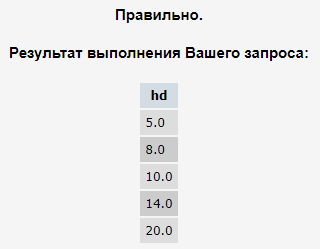

###Задание: 16 (Serge I: 2003-02-03)
Найдите пары моделей PC, имеющих одинаковые скорость и RAM. В результате каждая пара указывается только один раз, т.е. (i,j), но не (j,i), Порядок вывода: модель с большим номером, модель с меньшим номером, скорость и RAM.  
Ответ:  
```
SELECT DISTINCT p1.model, p2.model, p1.speed, p1.ram  
FROM PC p1, PC p2  
WHERE p1.speed = p2.speed  
AND p1.ram = p2.ram  
AND p1.model > p2.model
```

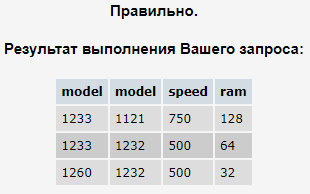

###Задание: 17 (Serge I: 2003-02-03)
Найдите модели ПК-блокнотов, скорость которых меньше скорости каждого из ПК.
Вывести: type, model, speed  
Ответ:  
```
SELECT DISTINCT type, Laptop.model, speed FROM Laptop  
INNER JOIN Product ON Laptop.model = Product.model  
WHERE speed < (SELECT MIN(PC.speed) FROM PC)
```

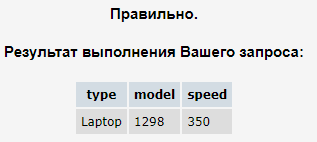

###Задание: 18 (Serge I: 2003-02-03)
Найдите производителей самых дешевых цветных принтеров. Вывести: maker, price  
Ответ:  
```
SELECT DISTINCT maker, price  
FROM Product  
INNER JOIN Printer ON Product.model = Printer.model  
WHERE color = 'y' AND price = (SELECT MIN(price) FROM Printer WHERE color = 'y')  
```
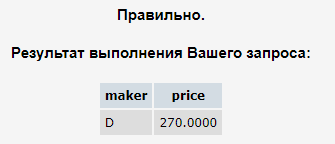

###Задание: 19 (Serge I: 2003-02-13)
Для каждого производителя, имеющего модели в таблице Laptop, найдите средний размер экрана выпускаемых им ПК-блокнотов.
Вывести: maker, средний размер экрана.
Ответ:  
```
SELECT maker, AVG(screen) FROM Product  
INNER JOIN Laptop ON Product.model = Laptop.model  
GROUP BY maker  
```
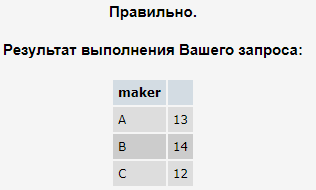

###Задание: 20 (Serge I: 2003-02-13)
Найдите производителей, выпускающих по меньшей мере три различных модели ПК. Вывести: Maker, число моделей ПК.  
Ответ:  
```
SELECT maker, COUNT(model) FROM Product  
WHERE type = 'PC'  
GROUP BY maker  
HAVING COUNT(model) > 2  
```
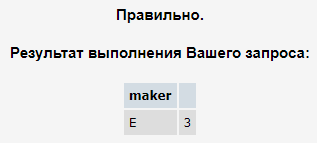



###Задание: 21 (Serge I: 2003-02-13)
Найдите максимальную цену ПК, выпускаемых каждым производителем, у которого есть модели в таблице PC.
Вывести: maker, максимальная цена.  
Ответ:  
```
SELECT maker, MAX(price) FROM Product  
INNER JOIN PC ON Product.model = PC.model  
GROUP BY maker  
```
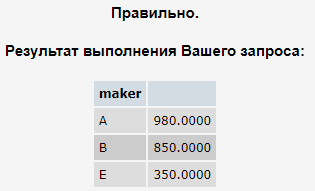

###Задание: 22 (Serge I: 2003-02-13)
Для каждого значения скорости ПК, превышающего 600 МГц, определите среднюю цену ПК с такой же скоростью. Вывести: speed, средняя цена.  
Ответ:  
```
SELECT DISTINCT speed, AVG(price) AS avg_price FROM PC  
WHERE speed > 600 AND speed = speed  
GROUP BY speed  
```
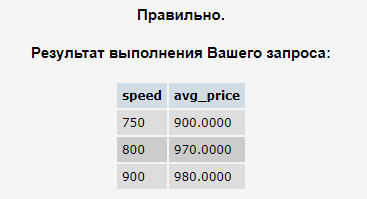

###Задание: 23 (Serge I: 2003-02-14)
Найдите производителей, которые производили бы как ПК
со скоростью не менее 750 МГц, так и ПК-блокноты со скоростью не менее 750 МГц.
Вывести: Maker

Ответ:  
```
SELECT maker FROM Product  
INNER JOIN PC ON Product.model = PC.model  
WHERE PC.speed >=750  
INTERSECT  
SELECT maker FROM Product  
INNER JOIN Laptop ON Product.model = Laptop.model  
WHERE Laptop.speed >=750  
```
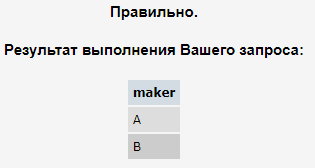

###Задание: 24 (Serge I: 2003-02-03)
Перечислите номера моделей любых типов, имеющих самую высокую цену по всей имеющейся в базе данных продукции.


Ответ:  
```
WITH maxes AS (  
SELECT model, MAX(price) AS maxpr  
FROM PC  
GROUP BY model  
HAVING MAX(price) = (SELECT MAX(price) FROM PC)  
UNION  
SELECT model, MAX(price) AS maxpr  
FROM Laptop  
GROUP BY model  
HAVING MAX(price) = (SELECT MAX(price) FROM Laptop)  
UNION  
SELECT model, MAX(price) AS maxpr  
FROM Printer  
GROUP BY model  
HAVING MAX(price) = (SELECT MAX(price) FROM Printer))  

SELECT model FROM maxes WHERE maxpr = (SELECT MAX(maxpr) FROM maxes)  
```
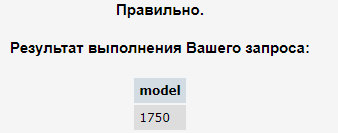

###Задание: 25 (Serge I: 2003-02-14)
Найдите производителей принтеров, которые производят ПК с наименьшим объемом RAM и с самым быстрым процессором среди всех ПК, имеющих наименьший объем RAM. Вывести: Maker  
Ответ:  
```
WITH x AS (  
SELECT DISTINCT maker, speed FROM Product  
INNER JOIN PC ON Product.model = PC.model  
WHERE ram = (SELECT MIN(ram) FROM PC))  

SELECT DISTINCT maker FROM x  
WHERE speed = (SELECT MAX(speed) from x)  
AND maker IN  
(SELECT maker FROM Product where type = 'printer')  
```
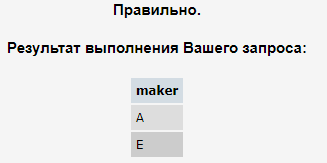

###Задание: 26 (Serge I: 2003-02-14)
Найдите среднюю цену ПК и ПК-блокнотов, выпущенных производителем A (латинская буква). Вывести: одна общая средняя цена.  
Ответ:  
```
WITH pc_lap_price AS (  
SELECT code, price, ram, hd FROM PC  
WHERE model IN (SELECT model FROM Product where maker = 'A')   
UNION  
SELECT code, price, ram, hd FROM Laptop  
WHERE model IN (SELECT model FROM Product where maker = 'A'))  

SELECT AVG(price) FROM pc_lap_price  
```
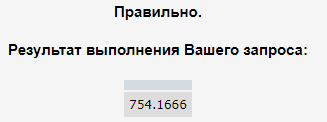


###Задание: 27 (Serge I: 2003-02-03)
Найдите средний размер диска ПК каждого из тех производителей, которые выпускают и принтеры. Вывести: maker, средний размер HD.  
Ответ:  
```
SELECT maker, AVG(hd) FROM Product  
INNER JOIN PC ON Product.model = PC.model  
WHERE maker IN (SELECT maker FROM Product WHERE type = 'printer')  
GROUP BY maker  
```
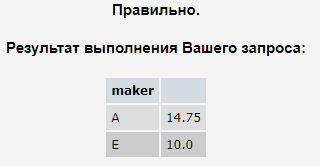

###Задание: 28 (Serge I: 2012-05-04)
Используя таблицу Product, определить количество производителей, выпускающих по одной модели.

Ответ:  
```
WITH one AS(  
SELECT COUNT(maker) AS col FROM Product  
GROUP BY maker HAVING COUNT(maker) = 1)  

SELECT COUNT(col) FROM one  
```
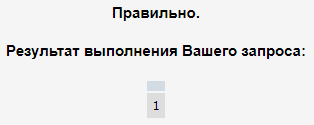


###Задание: 29 (Serge I: 2003-02-14)
База данных для заданий 29, 30:  
Фирма имеет несколько пунктов приема вторсырья. Каждый пункт получает деньги для их выдачи сдатчикам вторсырья. Сведения о получении денег на пунктах приема записываются в таблицу:  
Income_o(point, date, inc)  
Первичным ключом является (point, date). При этом в столбец date записывается только дата (без времени), т.е. прием денег (inc) на каждом пункте производится не чаще одного раза в день.  

Сведения о выдаче денег сдатчикам вторсырья записываются в таблицу:  
Outcome_o(point, date, out)  
В этой таблице также первичный ключ (point, date) гарантирует отчетность каждого пункта о выданных деньгах (out) не чаще одного раза в день.  

В случае, когда приход и расход денег может фиксироваться несколько раз в день, используется другая схема с таблицами, имеющими первичный ключ code:  
Income(code, point, date, inc)  
Outcome(code, point, date, out)  
Здесь также значения столбца date не содержат времени.


---



В предположении, что приход и расход денег на каждом пункте приема фиксируется не чаще одного раза в день [т.е. первичный ключ (пункт, дата)], написать запрос с выходными данными (пункт, дата, приход, расход). Использовать таблицы Income_o и Outcome_o.  

Ответ:  

```
SELECT income_o.point, income_o.date, inc, out
FROM income_o LEFT JOIN outcome_o ON income_o.point = outcome_o.point
AND income_o.date = outcome_o.date
UNION
SELECT outcome_o.point, outcome_o.date, inc, out
FROM income_o RIGHT JOIN outcome_o ON income_o.point = outcome_o.point
AND income_o.date = outcome_o.date

```  
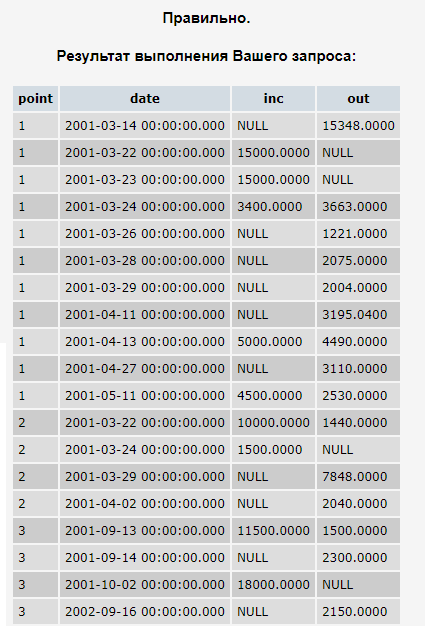



###Задание: 30 (Serge I: 2003-02-14)
В предположении, что приход и расход денег на каждом пункте приема фиксируется произвольное число раз (первичным ключом в таблицах является столбец code), требуется получить таблицу, в которой каждому пункту за каждую дату выполнения операций будет соответствовать одна строка.
Вывод: point, date, суммарный расход пункта за день (out), суммарный приход пункта за день (inc). Отсутствующие значения считать неопределенными (NULL).  

Ответ:  

```
WITH a AS(
SELECT point, date, SUM(inc) AS Income
FROM income GROUP BY point, date),
b AS(
SELECT point, date, SUM(out) AS Outcome
FROM Outcome GROUP BY point, date)

SELECT a.point, a.date, Outcome, Income
FROM a LEFT JOIN b ON a.point = b.point
AND a.date = b.date
UNION
SELECT b.point, b.date, Outcome, Income
FROM a RIGHT JOIN b ON b.point = a.point
AND b.date = a.date
```
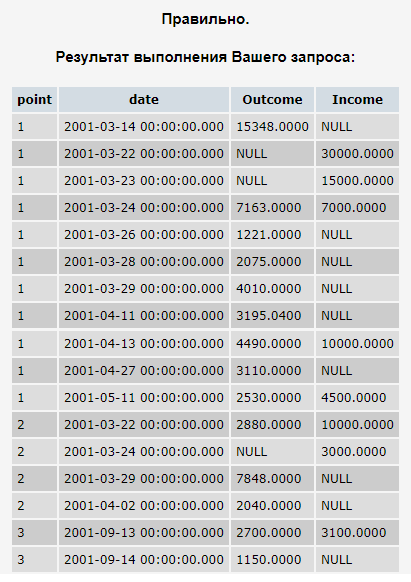